# Lab 7: Dimensionality Reduction and Spectral Clustering


## Preprocess Data: check for missing values

In [2]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import normalized_mutual_info_score

heartData = pd.read_csv("D:\Programming\Python_code\PrinciplesOfDS_Course\Labs\Data\heart.csv")
print(heartData.info()) # all data types int or float, no non-numeric features. No categorical features to convert 

# Check for missing values 
heartData.isna().sum()/heartData.shape[0] # all values 0. No missing values. 

X, y = heartData.drop(columns='target'), heartData.target

normalizer = StandardScaler()
X_norm = normalizer.fit_transform(X)
# print("X", X.iloc[:10,])
# print('X_norm',X_norm[:10,])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [3]:
# no point in doing more than 2 clusters as we know there are only 2 possible categories already
cluster = KMeans(n_clusters=2, random_state=1).fit(X_norm) 

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.3234


c:\Users\Tanner_N\AppData\Local\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Try different hyper-parameters


In [4]:
test_k = [2,3,4,5]
test_n_init = [10, 20, 30, 50]
test_init = ['k-means++', 'random']

best_nmi = 0
best_k = None
best_n_init = None
best_init = None

for k in test_k:
    for n in test_n_init:
        for init in test_init:
            temp_cluster = KMeans(n_clusters=k, init=init, n_init=n).fit(X_norm)
            temp_nmi = normalized_mutual_info_score(temp_cluster.labels_, y, average_method='arithmetic')
            print(temp_nmi)
            if(temp_nmi > best_nmi):
                best_nmi = temp_nmi
                best_k = k
                best_n_init = n
                best_init = init

print("Best of each category:\nBest nmi {}\nBest k cluster {}\nBest n_init {}\nBest init {}".format(best_nmi, best_k, best_n_init, best_init))

bestKmeans_nmi = best_nmi

0.3261551563327772
0.32341194603576945
0.3261551563327772
0.32967483885081544
0.32967483885081544
0.32341194603576945
0.3234119460357694
0.3234119460357694
0.2749021353467294
0.27136707411437866
0.2749021353467294
0.2749021353467294
0.2749021353467294
0.2749021353467294
0.2749021353467294
0.2749021353467294
0.20624278848512545
0.1716795654858564
0.20624278848512545
0.2030474974165272
0.20624278848512545
0.20624278848512545
0.20624278848512545
0.20486584603827884
0.1750241625002989
0.18811028092220297
0.19668555069459906
0.1721961902904418
0.2043842345678437
0.20250808424590222
0.21478650120732137
0.20645309142468846
Best of each category:
Best nmi 0.32967483885081544
Best k cluster 2
Best n_init 20
Best init random


### Thoughts on different parameters: 
As stated above, there really isnt a point in trying to use more than 2 clusters, as we only have 2 possible categories of data. We know this going in, so we know the optimal cluster amount going in. Results substantially change for the worse with greater cluster amounts, further, there is no real imrovement on the nmi score in testing other hyperparameters. 

## Agglomerative Clustering:


In [5]:
agg_cluster = AgglomerativeClustering(n_clusters=2).fit(X)

nmi = normalized_mutual_info_score(agg_cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the Agglomerative clustering method is {:.4f}'.format(nmi))

The normalized mutual information score of the Agglomerative clustering method is 0.0111


### Test different hyperparameters: 


In [6]:
n_clusters = [2,3,4,5,6,7,8,9,10]
linkage_setting = ['ward','complete','average','single']

best_agg_nmi = 0
best_setting = None
best_n_clusters = 0
for n in n_clusters:
    for s in linkage_setting:
        agg_cluster_temp = AgglomerativeClustering(n_clusters=n, linkage=s).fit(X)
        temp_nmi = normalized_mutual_info_score(agg_cluster_temp.labels_, y, average_method='arithmetic')
        print(temp_nmi)
        if(temp_nmi > best_agg_nmi):
            best_agg_nmi = temp_nmi
            best_setting = s
            best_n_clusters = n

print("Best nmi {:.4f}\nBest setting {}\nBest n_clusters {}".format(best_agg_nmi,best_setting, best_n_clusters))

0.011063515436362354
0.00027129245492457866
0.00027129245492457866
0.005652750492624307
0.009001669557496405
0.03393886998938809
0.005272370527725735
0.012547879744986242
0.009229764064007892
0.036507355506030355
0.02674253534651711
0.01749723859550799
0.01326847734067055
0.04322159014456702
0.030500596599103175
0.016133747429041743
0.02871304161117195
0.06274143379776896
0.03129531303084799
0.021841921862053443
0.03690019438473182
0.06378177909188953
0.0414857169831583
0.025893914500633223
0.036909483511863635
0.05676875387176104
0.051571308995400744
0.026296269762886657
0.03828095912038763
0.0605508197088417
0.050286051160642456
0.031208774165090748
0.03866165426109681
0.060131912673690044
0.051291767771655096
0.03592698315155799
Best nmi 0.0638
Best setting complete
Best n_clusters 7


## Spectral Clustering: 
The above code remains mostly unchanged from lab 6, as directed within lab 7 a comparison of the clustering methods will be drawn hereafter. 


In [7]:
# partition the dataset with spectral clustering, here we use the 'nearest_neighbors' method to construct the similarity graph
cluster_sp_nn = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='nearest_neighbors', random_state=0).fit(X)

# partition the dataset with spectral clustering, here we use the 'fully connected graph' method to construct the similarity graph
cluster_sp_rbf = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='rbf', random_state=0).fit(X)

nmi_sp_nn = normalized_mutual_info_score(cluster_sp_nn.labels_, y, average_method='arithmetic')
nmi_sp_rbf = normalized_mutual_info_score(cluster_sp_rbf.labels_, y, average_method='arithmetic')

print("K-nearest neighbors NMI:", round(nmi_sp_nn,4), "Fully connected Graph NMI:", round(nmi_sp_rbf,4))

print("Best of each clustering method:\nBest of Kmeans: {:.4f}\nBest of Agglormerative: {:.4f}\nBest of Spectral: {:.4f}".format(bestKmeans_nmi, best_agg_nmi, nmi_sp_nn))

c:\Users\Tanner_N\AppData\Local\Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


K-nearest neighbors NMI: 0.0209 Fully connected Graph NMI: 0.0003
Best of each clustering method:
Best of Kmeans: 0.3297
Best of Agglormerative: 0.0638
Best of Spectral: 0.0209


## Discussion of Clustering methods: 
None of the clustering methods perform particularly well with the normalized data. With no score passing .35 it is clear that classification by these clustering algorithms is not particularly effective for this data set. I imagine there may be a lot of noise within the data set due to certain variables, perhaps attempting to cluster with removal of different features could enable better performance. There may be a subset of features which are more closely correlated with the target variable which represents the clusters which we wish to detect. If creation of a pretrained model was the goal for detecting the target when it is not included in data, (like detecting heart disease based on other metrics), I believe it would be resonable to spend time testing which features tend to correlate most closely or simply running many clustering models against all possible features sets to see where performance peaks. 

In [8]:
# PCA on heart disease data set
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# No need to check for missing values or categorical featuers, we have used this data alredy and know there are no such preprocessing steps necessary. 
X_pca, y_pca = heartData.drop(columns='target'), heartData.target

print('number of original features: {}\n'.format(X_pca.shape[1]))

# data before centering: 
print(X_pca.iloc[:5,:])
# Center data
X_pca = X_pca - np.mean(X_pca, axis = 0)
# Data after centering: 
print(X_pca.iloc[:5,:])

# PCA 
pca = PCA(n_components=2)
X_r = pca.fit(X_pca).transform(X_pca)

print('\nnumber of new features: {}'.format(X_r.shape[1]))

explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratios:", explained_variance_ratios) # [0.7475642  0.15037022] 

number of original features: 13

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
         age       sex        cp   trestbps        chol       fbs   restecg  \
0   8.633663  0.316832  2.033003  13.376238  -13.264026  0.851485 -0.528053   
1 -17.366337  0.316832  1.033003  -1.623762    3.735974 -0.148515  0.471947   
2 -13.366337 -0.683168  0.033003  -1.623762  -42.264026 -0.148515 -0.528053   
3   1.633663  0.316832  0.033003 -11.623762  -10.264026 -0.148515  0.471947   
4

Text(0.5, 1.0, 'PCA scatter plot')

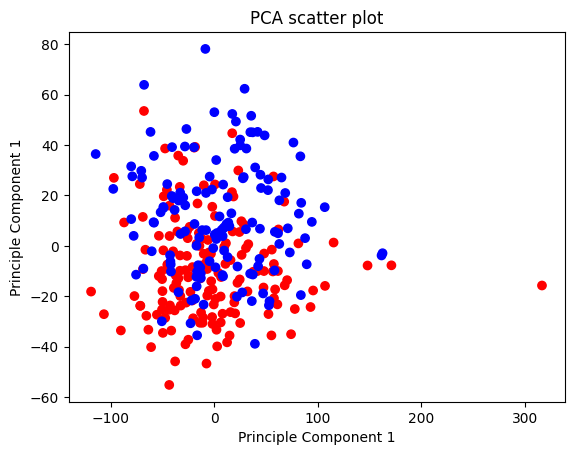

In [9]:
# visualization of principle components: 
plt.scatter(X_r[:,0], X_r[:,1], c=y_pca, cmap='bwr')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 1")
plt.title("PCA scatter plot")

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

pca2 = PCA(n_components=2)
X_r_2 = pca2.fit(X_pca).transform(X_pca)
print("Explained variance ratios for 2 componenet PCA:", pca2.explained_variance_ratio_) 

pca5 = PCA(n_components=5)
X_r_5 = pca5.fit(X_pca).transform(X_pca)
print("Explained variance ratios for 5 componenet PCA:", pca5.explained_variance_ratio_) 

pca10 = PCA(n_components=10)
X_r_10 = pca10.fit(X_pca).transform(X_pca)
print("Explained variance ratios for 10 componenet PCA:", pca10.explained_variance_ratio_) 


Explained variance ratios for 2 componenet PCA: [0.7475642  0.15037022]
Explained variance ratios for 5 componenet PCA: [7.47564199e-01 1.50370221e-01 8.45968470e-02 1.62159604e-02
 3.84085658e-04]
Explained variance ratios for 10 componenet PCA: [7.47564199e-01 1.50370221e-01 8.45968470e-02 1.62159604e-02
 3.84085658e-04 2.81234229e-04 2.28993383e-04 9.98328415e-05
 7.72143117e-05 5.87402295e-05]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle

print(X_r_2.shape)
print(X_r_5.shape)
print(X_r_10.shape)

#splitting all data
X_train_val_2, X_test_2, y_train_val_2, y_test_2 = train_test_split(X_r_2, y_pca, test_size=0.14, random_state=17)
X_train_val_5, X_test_5, y_train_val_5, y_test_5 = train_test_split(X_r_5, y_pca, test_size=0.14, random_state=25)
X_train_val_10, X_test_10, y_train_val_10, y_test_10 = train_test_split(X_r_10, y_pca, test_size=0.14, random_state=3)

print(X_train_val_2.shape, X_test_2.shape, y_train_val_2.shape)
print(X_train_val_2[:3], "\n\n", X_train_val_5[:3], "\n\n")

#scaling all data
normalizer = StandardScaler()
X_train_val_2 = normalizer.fit_transform(X_train_val_2)
X_test_2 = normalizer.transform(X_test_2)

normalizer5 = StandardScaler()
X_train_val_5 = normalizer5.fit_transform(X_train_val_5)
X_test_5 = normalizer5.transform(X_test_5)

normalizer10 = StandardScaler()
X_train_val_10 = normalizer10.fit_transform(X_train_val_10)
X_test_10 = normalizer10.transform(X_test_10)

print(X_train_val_2[:3], "\n\n", X_train_val_5[:3])

#conversion to np.ndarray necessary for grabbing indices of folds
y_train_val_2 = y_train_val_2.to_numpy()
y_train_val_5 = y_train_val_5.to_numpy()
y_train_val_10 = y_train_val_10.to_numpy()

(303, 2)
(303, 5)
(303, 10)
(260, 2) (43, 2) (260,)
[[ 17.24035814  44.69270471]
 [  6.45117302 -12.35371762]
 [171.16770753  -7.71869434]] 

 [[-51.00549993  -9.98785187 -27.81764979  -1.0793056   -0.58521708]
 [-26.33994024   6.02689407  -5.43480777   4.44526234   0.96934893]
 [ 24.93466935 -30.61213888   9.73795255   8.18713657  -0.34489908]] 


[[ 0.28934185  1.98017967]
 [ 0.08674464 -0.50907111]
 [ 3.17975942 -0.30681942]] 

 [[-0.97496045 -0.38797796 -1.57155262 -0.12789275 -0.52388394]
 [-0.50536823  0.28819004 -0.28794527  0.58730346  0.85452329]
 [ 0.4708171  -1.2587681   0.58217956  1.07171676 -0.31079805]]


### Finding Best Hyperparameters for Each PCA Decomp 

In [31]:
# 5 fold cross-validation
folds = 5

# total number of training samples
num_train_val = X_train_val_2.shape[0]

#shuffleing indices of samples to remove potential ordering bias
sample_idx = np.arange(num_train_val)
shuffle(sample_idx)

print(sample_idx.shape)

# splitting indices into 5 folds
folds_idx = sample_idx.reshape(folds, -1)
print('index of folds\n', folds_idx)

# set of hyperparameters to be tested
regTerms = [.00001, .0001, .001, .01, .1, 1, 10, 20, 50, 100]

best_acc_2 = 0.0
best_reg_2 = 0.0
best_f1_2 = 0.0
best_precision_2 = 0.0
best_recall_2 = 0.0

for reg in regTerms:
    
    # 10-fold cross-validation
    sum_acc = 0.0
    sum_f1 = 0.0
    sum_precision = 0.0
    sum_recall = 0.0
    
    for fold in range(folds):
        
        index_of_folds_temp = folds_idx.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
      
        # training set
        X_train = X_train_val_2[train_index]
        y_train = y_train_val_2[train_index]
        
        # validation set
        X_valid = X_train_val_2[valid_index]
        y_valid = y_train_val_2[valid_index]
                
        # build the model with different hyperparameters
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #train the model with the training set
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        f1 = f1_score(y_valid, y_valid_pred)
        precision = precision_score(y_valid, y_valid_pred)
        recall = recall_score(y_valid, y_valid_pred)
        
        sum_acc += acc
        sum_f1 += f1
        sum_precision += precision 
        sum_recall += recall
    
    cur_acc = sum_acc / folds
    cur_f1 = sum_f1 / folds
    cur_precision = sum_precision / folds
    cur_recall = sum_recall / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc_2:
        best_acc_2 = cur_acc
        best_reg = reg
        
    # storing best of each metric to see if they're associated with different regularization terms 
    if cur_f1 > best_f1_2:
        best_f1_2 = cur_f1
        best_f1_reg = reg
    if cur_precision > best_precision_2:
        best_precision_2 = cur_precision
        best_precision_reg = reg
    if cur_recall > best_recall_2:
        best_recall_2 = cur_recall
        best_recall_reg = reg

print("\n\nFor PCA with _2 components")        
print('best_acc', best_acc_2, 'best_reg', best_reg)
print("best_f1 and f1 reg:", best_f1_2, best_f1_reg)
print("best_precision and precision reg:", best_precision_2, best_precision_reg)
print("best_recall and recall reg:", best_recall_2, best_recall_reg)

(260,)
index of folds
 [[117   7   2 154 204 155 203  52  49 120  41  31 231  10 225 175  86 223
   81   5 103  35 210 238 177  74  17 108 109  60 122  83 168 187 206 244
  234  54  95 102 216 129  14  13  66 113 112 256 134  69 257 197]
 [114 229 199 243 237 140 153  43 125  38 162 259 116   1  51 165  42 147
  142 179  96 159 217 182 191 100 215 213  65 146 127 128 189   4 133  88
   48 124  68  94 184  18 202 253 104  47 185  59  85 230 151  67]
 [ 39 131 220  76 233  19 219 250   3 246 107  24 105  26  20 254 211  25
  207 119 171 186  62  57 143  71 232  27  21  58  22 106 255  78 227 130
   46  36   9 118  23 192  64  29  28  70  11 157 214 101 164 252]
 [ 73  12  34  63 126 208 180 158 145 251 222 111 245 160 176  92  87 212
   79 167 156 221   6 115 110  44  30  89 170 139 258 241  40 248  99 181
    8 161 247 218 240 200  91 148  56 242 239  97  72 135  53 174]
 [ 32 235 198 236 183 144   0  75 209 132 141 190 194  16 121 136 224  50
  138 163  93 205  61 150  33  45 173  82 1

In [40]:
# 5 fold cross-validation
folds = 5

# total number of training samples
num_train_val = X_train_val_5.shape[0]

#shuffleing indices of samples to remove potential ordering bias
sample_idx = np.arange(num_train_val)
shuffle(sample_idx)

print(sample_idx.shape)

# splitting indices into 10 folds
folds_idx = sample_idx.reshape(folds, -1)
print('index of folds\n', folds_idx)

# set of hyperparameters to be tested
regTerms = [.00001, .0001, .001, .01, .1, 1, 10, 20, 50, 100]

best_acc_5 = 0.0
best_reg_5 = 0.0
best_f1_5 = 0.0
best_precision_5 = 0.0
best_recall_5 = 0.0

for reg in regTerms:
    
    # 10-fold cross-validation
    sum_acc = 0.0
    sum_f1 = 0.0
    sum_precision = 0.0
    sum_recall = 0.0
    
    for fold in range(folds):
        
        index_of_folds_temp = folds_idx.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
      
        # training set
        X_train = X_train_val_5[train_index]
        y_train = y_train_val_5[train_index]
        
        # validation set
        X_valid = X_train_val_5[valid_index]
        y_valid = y_train_val_5[valid_index]
                
        # build the model with different hyperparameters
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #train the model with the training set
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        f1 = f1_score(y_valid, y_valid_pred)
        precision = precision_score(y_valid, y_valid_pred)
        recall = recall_score(y_valid, y_valid_pred)
        
        sum_acc += acc
        sum_f1 += f1
        sum_precision += precision 
        sum_recall += recall
    
    cur_acc = sum_acc / folds
    cur_f1 = sum_f1 / folds
    cur_precision = sum_precision / folds
    cur_recall = sum_recall / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc_5:
        best_acc_5 = cur_acc
        best_reg = reg
        
    # storing best of each metric to see if they're associated with different regularization terms 
    if cur_f1 > best_f1_5:
        best_f1_5 = cur_f1
        best_f1_reg = reg
    if cur_precision > best_precision_5:
        best_precision_5 = cur_precision
        best_precision_reg = reg
    if cur_recall > best_recall_5:
        best_recall_5 = cur_recall
        best_recall_reg = reg

print("\n\nFor PCA with _5 components")        
print('best_acc', best_acc_5, 'best_reg', best_reg)
print("best_f1 and f1 reg:", best_f1_5, best_f1_reg)
print("best_precision and precision reg:", best_precision_5, best_precision_reg)
print("best_recall and recall reg:", best_recall_5, best_recall_reg)

(260,)
index of folds
 [[  1 173  91  30 149 206 223  54  67  93 182 231  61 183  31 138 111 150
   83 143 258  29 189  14 136  12 156 208  23   2 212  98 230  46 137 122
  146 186  36 114 193  89 101 245 200 131 141 166 157 213 107 113]
 [228 142 199  50 121 248  10 133  48  35 192 190 255 218  94 242 100  53
    3  65 145 252  33 123 110 202 226 195 185 216  90 148 112 214  19 256
   15 176 151  62 132 217  70  68 219 240 225 246   0  59 104  21]
 [ 18 233 155  11 257 163 127  71 235 188  55  47 108 227   4  92  22 194
  198 215 239 158  77 162 168  26  49 249  79  24  82 210  66  81 207  42
  130 222 164 109 224 221 238   6  84 117 209  73 201 181 220  40]
 [ 58  57  95 197  88 180 120 250 126   9  41 247  99  51  87  27  13 128
   96 172 144 105 187 152 147 191  64 179 102 244 251 139 153 115 211   5
  175 140 237  60  69 134 178  17  76 125 196  34  86 259 167 116]
 [ 80 165 243  28  72  38 160  43  44  75 169  32 205  85  63  20   8 241
  118 254  56 106 161 135 154  25 184 171 2

In [59]:
# 5 fold cross-validation
folds = 5

# total number of training samples
num_train_val = X_train_val_10.shape[0]

#shuffleing indices of samples to remove potential ordering bias
sample_idx = np.arange(num_train_val)
shuffle(sample_idx)

print(sample_idx.shape)

# splitting indices into 10 folds
folds_idx = sample_idx.reshape(folds, -1)
print('index of folds\n', folds_idx)

# set of hyperparameters to be tested
regTerms = [.00001, .0001, .001, .01, .1, 1, 10, 20, 50, 100]

best_acc_10 = 0.0
best_reg_10 = 0.0
best_f1_10 = 0.0
best_precision_10 = 0.0
best_recall_10 = 0.0

for reg in regTerms:
    
    # 10-fold cross-validation
    sum_acc = 0.0
    sum_f1 = 0.0
    sum_precision = 0.0
    sum_recall = 0.0
    
    for fold in range(folds):
        
        index_of_folds_temp = folds_idx.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
      
        # training set
        X_train = X_train_val_10[train_index]
        y_train = y_train_val_10[train_index]
        
        # validation set
        X_valid = X_train_val_10[valid_index]
        y_valid = y_train_val_10[valid_index]
                
        # build the model with different hyperparameters
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #train the model with the training set
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        f1 = f1_score(y_valid, y_valid_pred)
        precision = precision_score(y_valid, y_valid_pred)
        recall = recall_score(y_valid, y_valid_pred)
        
        sum_acc += acc
        sum_f1 += f1
        sum_precision += precision 
        sum_recall += recall
    
    cur_acc = sum_acc / folds
    cur_f1 = sum_f1 / folds
    cur_precision = sum_precision / folds
    cur_recall = sum_recall / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc_10:
        best_acc_10 = cur_acc
        best_reg = reg
        
    # storing best of each metric to see if they're associated with different regularization terms 
    if cur_f1 > best_f1_10:
        best_f1_10 = cur_f1
        best_f1_reg = reg
    if cur_precision > best_precision_10:
        best_precision_10 = cur_precision
        best_precision_reg = reg
    if cur_recall > best_recall_10:
        best_recall_10 = cur_recall
        best_recall_reg = reg

print("\n\nFor PCA with _10 components")        
print('best_acc', best_acc_10, 'best_reg', best_reg)
print("best_f1 and f1 reg:", best_f1_10, best_f1_reg)
print("best_precision and precision reg:", best_precision_10, best_precision_reg)
print("best_recall and recall reg:", best_recall_10, best_recall_reg)

(260,)
index of folds
 [[245 249   0  94  69 193   6   2  72 105 152 171 166 254 149 221 143 181
   48 227   5 142 147 100 117 179  75 150  79  78  66 160 153 200 186 116
   92 256 238 220 214 173 217 183 216 190  74  36 114  20 161 242]
 [ 60 126 124 121  89  96 194 169  65 139 130  45  88 209 257 206 188 111
   38  15 172   9  61 253 251 120 180  22  49  31  84  11  46  86 140  87
   19  37  47 110 177 233 131 125 127  14 101 239 156  67  34 198]
 [201 204 191  10 210 192 205 135 229 118 202 106 158  51  13   1   4 228
   12 211 178  57 223 203 168 195 231 136 241 222  43  54 255 122  91  16
  104 219  28  17 252  40  56  24 159  58  50 165  62  83  29 151]
 [243 103 174  68  42 162  52 244 218 226  90  98 215 133 236  39  71  53
   59  85 250  30  44 157 146 115  55 234 176 154  35 237 155  93 119 248
   26 187 102 208 144  70  27 175 128 123 230 141  81 258 184  76]
 [246  95  25 182 167 235  33   3  18 113 224 225 134 196 199  80 108 197
  212  97  41  64  82 185 232 213  99  73  

## Train Log Regression models each with best Reg Terms per PCA Decomposition


In [68]:
# training model of full training data with best regularization term 
clf_2 = LogisticRegression(penalty='l2', C=10, solver='lbfgs')    
clf_2.fit(X_train_val_2, y_train_val_2)

y_prediction_2 = clf_2.predict(X_test_2)
acc_2 = accuracy_score(y_test_2, y_prediction_2)
f1_2 = f1_score(y_test_2, y_prediction_2)
recall_2 = recall_score(y_test_2, y_prediction_2)
precision_2 = precision_score(y_test_2, y_prediction_2)

print("Evaluation Metrics for _2 component PCA decomp + Logistic Regression:\n")
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc_2, recall_2, precision_2, f1_2))

Evaluation Metrics for _2 component PCA decomp + Logistic Regression:

accuracy: 0.558, recall: 0.800, precision: 0.429, f1: 0.558,


In [65]:
clf_5 = LogisticRegression(penalty='l2', C=1, solver='lbfgs')    
clf_5.fit(X_train_val_5, y_train_val_5)

y_prediction_5 = clf_5.predict(X_test_5)
acc_5 = accuracy_score(y_test_5, y_prediction_5)
f1_5 = f1_score(y_test_5, y_prediction_5)
recall_5 = recall_score(y_test_5, y_prediction_5)
precision_5 = precision_score(y_test_5, y_prediction_5)

print("Evaluation Metrics for _5 component PCA decomp + Logistic Regression:\n")
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc_5, recall_5, precision_5, f1_5))

Evaluation Metrics for _5 component PCA decomp + Logistic Regression:

accuracy: 0.744, recall: 0.773, precision: 0.739, f1: 0.756,


In [64]:
clf_10 = LogisticRegression(penalty='l2', C=1, solver='lbfgs')    
clf_10.fit(X_train_val_10, y_train_val_10)

y_prediction_10 = clf_10.predict(X_test_10)
acc_10 = accuracy_score(y_test_10, y_prediction_10)
f1_10 = f1_score(y_test_10, y_prediction_10)
recall_10 = recall_score(y_test_10, y_prediction_10)
precision_10 = precision_score(y_test_10, y_prediction_10)

print("Evaluation Metrics for _10 component PCA decomp + Logistic Regression:\n")
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc_10, recall_10, precision_10, f1_10))

Evaluation Metrics for _10 component PCA decomp + Logistic Regression:

accuracy: 0.884, recall: 0.929, precision: 0.897, f1: 0.912,


## Discussion: 

For the logisitic regression model it appears as though despite a majority of the datas variance being captured within the first two components we see substantial accuracy improvements as more components are used. I feel quite unclear on why this would be true, as hypothetically I imagine the amount of variance within a set of features would closely correspond to the accuracy a model predicts with when fed that data. 